# Introduction

The data was obtained from the NASA POWER (Predictions of Worldwide Energy Resources) using their website: https://power.larc.nasa.gov/api/pages/

The datasets contains 11 parameters of atmospheric data taken at an hourly rate from 01/01/2001 to 31/12/2021.

Parameter(s): 
T2M             MERRA-2 Temperature at 2 Meters (C) 
T2MWET          MERRA-2 Wet Bulb Temperature at 2 Meters (C) 
PS              MERRA-2 Surface Pressure (kPa) 
QV2M            MERRA-2 Specific Humidity at 2 Meters (g/kg) 
T2MDEW          MERRA-2 Dew/Frost Point at 2 Meters (C) 
WD10M           MERRA-2 Wind Direction at 10 Meters (Degrees) 
V10M            MERRA-2 Northward Wind at 10 Meters (m/s) 
U10M            MERRA-2 Eastward Wind at 10 Meters (m/s) 
RH2M            MERRA-2 Relative Humidity at 2 Meters (%) 
WS10M           MERRA-2 Wind Speed at 10 Meters (m/s) 
PRECTOTCORR     MERRA-2 Precipitation Corrected (mm/hour) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = "/home/veroastro/Documents/NASA_POWER_ds/data/"
df = pd.read_csv(filepath + "POWER_Point_Hourly_20010101_20211231_041d39N_002d17E_UTC.csv")
df.describe()


,YEAR,MO,DY,HR,WD10M,T2MWET,T2MDEW,PS,WS10M,V10M,U10M,QV2M,T2M,RH2M,PRECTOTCORR
count,184080.000000,184080.000000,184080.000000,184080.000000,184080.000000,184080.000000,184080.000000,184080.000000,184080.000000,184080.000000,184080.000000,184080.000000,184080.000000,184080.000000,184080.000000
mean,2011.000652,6.523077,15.729205,11.500000,197.665083,12.397958,9.233130,98.111914,3.258208,0.423541,0.555808,8.045337,15.562784,69.783476,0.058508
std,6.055120,3.448672,8.799933,6.922205,93.519314,6.412334,6.205453,0.670699,1.864373,2.465798,2.742876,3.140028,7.524129,19.605445,0.296725
min,2001.000000,1.000000,1.000000,0.000000,0.000000,-8.770000,-15.450000,94.390000,0.020000,-13.550000,-14.770000,1.100000,-4.440000,13.750000,0.000000
25%,2006.000000,4.000000,8.000000,5.750000,128.170000,7.500000,4.900000,97.760000,1.920000,-1.340000,-1.040000,5.550000,9.550000,54.060000,0.000000
50%,2011.000000,7.000000,16.000000,11.500000,202.345000,12.340000,9.440000,98.150000,2.930000,0.340000,0.620000,7.570000,15.340000,72.560000,0.000000
75%,2016.000000,10.000000,23.000000,17.250000,278.190000,17.880000,14.342500,98.520000,4.240000,2.170000,2.130000,10.500000,21.150000,86.250000,0.010000
max,2021.000000,12.000000,31.000000,23.000000,359.910000,26.630000,22.520000,100.350000,18.750000,10.790000,18.320000,17.640000,38.200000,100.000000,50.080000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184080 entries, 0 to 184079
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   YEAR         184080 non-null  int64  
 1   MO           184080 non-null  int64  
 2   DY           184080 non-null  int64  
 3   HR           184080 non-null  int64  
 4   WD10M        184080 non-null  float64
 5   T2MWET       184080 non-null  float64
 6   T2MDEW       184080 non-null  float64
 7   PS           184080 non-null  float64
 8   WS10M        184080 non-null  float64
 9   V10M         184080 non-null  float64
 10  U10M         184080 non-null  float64
 11  QV2M         184080 non-null  float64
 12  T2M          184080 non-null  float64
 13  RH2M         184080 non-null  float64
 14  PRECTOTCORR  184080 non-null  float64
dtypes: float64(11), int64(4)
memory usage: 21.1 MB


In [4]:
def hist_plots( data: pd.DataFrame,
               rows: int,
              cols: int,
              figsize: tuple):
    fig, axes = plt.subplots(rows,cols, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        if i < len(data.columns):
            data[sorted(data.columns)[i]].plot.hist(bins=30, ax=ax)
            ax.set_title(f'{sorted(data.columns)[i]} distribution', fontsize=14)
            ax.tick_params(axis='x', labelsize=10)
            ax.tick_params(axis='y', labelsize=10)
            ax.get_yaxis().get_label().set_visible(False)
        else:
            fig.delaxes(ax=ax)
    fig.tight_layout()

In [5]:
df.columns

Index(['YEAR', 'MO', 'DY', 'HR', 'WD10M', 'T2MWET', 'T2MDEW', 'PS', 'WS10M',
       'V10M', 'U10M', 'QV2M', 'T2M', 'RH2M', 'PRECTOTCORR'],
      dtype='object')

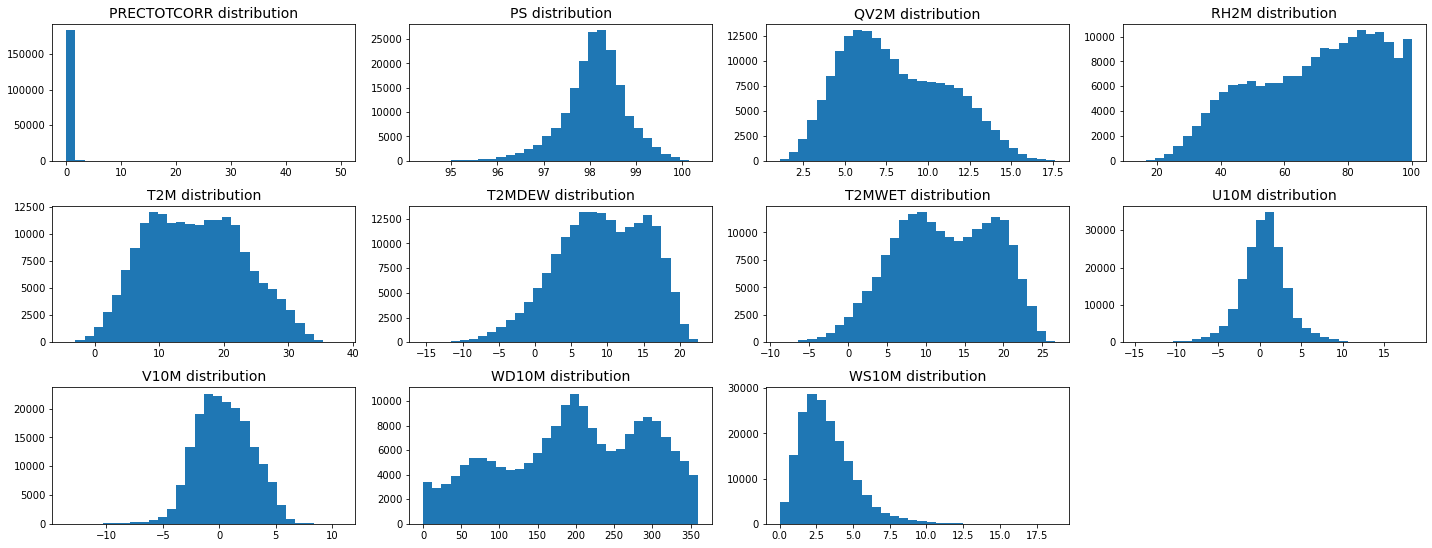

In [6]:
dist_df = df.drop(['YEAR', 'MO', 'DY', 'HR'], axis = 1)
hist_plots(data=dist_df,
          rows=4,
          cols=4,
          figsize=(20,10))

There is bimodality and multimodality in the data. This could be due to the seasons. So I define datasets for winter and summer months and check their distributions

In [7]:
# making the winter data set with the months december to march
jan = df.loc[df['MO'] == 1, :]
feb = df.loc[df['MO'] == 2, :]
mar = df.loc[df['MO'] == 3, :]
dec = df.loc[df['MO'] == 12, :]
winter = pd.concat([jan, feb, mar, dec], ignore_index=True)
winter.describe()

,YEAR,MO,DY,HR,WD10M,T2MWET,T2MDEW,PS,WS10M,V10M,U10M,QV2M,T2M,RH2M,PRECTOTCORR
count,61104.000000,61104.000000,61104.000000,61104.000000,61104.000000,61104.000000,61104.000000,61104.000000,61104.000000,61104.000000,61104.000000,61104.000000,61104.000000,61104.000000,61104.000000
mean,2011.001964,4.556952,15.679104,11.500000,218.347115,6.082712,3.552467,98.209578,3.491200,-0.615530,1.201621,5.241690,8.612995,73.775367,0.047201
std,6.054755,4.420772,8.785567,6.922243,102.188005,3.724214,4.300221,0.871668,2.068939,2.269214,3.081722,1.454003,4.356989,18.879428,0.327993
min,2001.000000,1.000000,1.000000,0.000000,0.000000,-8.770000,-15.450000,94.390000,0.020000,-13.550000,-14.770000,1.100000,-4.440000,14.560000,0.000000
25%,2006.000000,1.000000,8.000000,5.750000,136.037500,3.720000,0.900000,97.670000,2.090000,-2.120000,-0.560000,4.210000,5.630000,61.000000,0.000000
50%,2011.000000,3.000000,16.000000,11.500000,253.280000,6.440000,4.085000,98.310000,3.070000,-0.720000,1.300000,5.250000,8.340000,76.620000,0.000000
75%,2016.000000,12.000000,23.000000,17.250000,300.480000,8.760000,6.760000,98.840000,4.372500,0.950000,2.980000,6.290000,11.280000,89.440000,0.010000
max,2021.000000,12.000000,31.000000,23.000000,359.910000,16.750000,13.600000,100.350000,18.750000,10.110000,18.320000,10.190000,26.350000,100.000000,50.080000


In [8]:
#making the summer data set with the months june to september
jun = df.loc[df['MO'] == 6, :]
jul = df.loc[df['MO'] == 7, :]
aug = df.loc[df['MO'] == 8, :]
sep = df.loc[df['MO'] == 9, :]
summer = pd.concat([jun, jul, aug, sep], ignore_index=True)
summer.describe()

,YEAR,MO,DY,HR,WD10M,T2MWET,T2MDEW,PS,WS10M,V10M,U10M,QV2M,T2M,RH2M,PRECTOTCORR
count,61488.00000,61488.000000,61488.000000,61488.000000,61488.000000,61488.000000,61488.000000,61488.000000,61488.000000,61488.000000,61488.000000,61488.000000,61488.000000,61488.000000,61488.000000
mean,2011.00000,7.500000,15.754098,11.500000,181.105938,19.130423,15.165115,98.119443,2.999963,1.527042,0.083358,11.263988,23.095752,64.638464,0.052084
std,6.05535,1.110687,8.807028,6.922243,77.193584,2.855460,3.196216,0.371013,1.599455,2.209873,2.082250,2.143255,4.550469,19.240301,0.235780
min,2001.00000,6.000000,1.000000,0.000000,-0.000000,5.400000,-3.040000,96.520000,0.020000,-7.700000,-10.850000,3.230000,7.660000,16.060000,0.000000
25%,2006.00000,7.000000,8.000000,5.750000,133.700000,17.340000,13.380000,97.900000,1.740000,-0.160000,-1.200000,9.890000,19.787500,47.880000,0.000000
50%,2011.00000,7.500000,16.000000,11.500000,185.420000,19.370000,15.560000,98.140000,2.750000,1.500000,0.195000,11.350000,22.530000,66.120000,0.000000
75%,2016.00000,8.000000,23.000000,17.250000,222.740000,21.140000,17.410000,98.370000,4.140000,3.280000,1.400000,12.760000,26.490000,81.560000,0.010000
max,2021.00000,9.000000,31.000000,23.000000,359.830000,26.630000,22.520000,99.680000,12.140000,9.030000,11.160000,17.640000,38.200000,100.000000,11.180000


In [9]:
#modified hist_plots to plot 3 different datasets in one plot
def hist_plots2( data1: pd.DataFrame,
                data2 : pd.DataFrame,
                data3 : pd.DataFrame,
               rows: int,
              cols: int,
              figsize: tuple):
    fig, axes = plt.subplots(rows,cols, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        if i < len(data1.columns):
            data1[sorted(data1.columns)[i]].plot.hist(bins=30, ax=ax, label = 'winter')
            data2[sorted(data2.columns)[i]].plot.hist(bins=30, ax=ax, label = 'summer',alpha = 0.6)
            data3[sorted(data2.columns)[i]].plot.hist(bins=30, ax=ax, label = 'All',histtype= 'step')
            ax.set_title(f'{sorted(data1.columns)[i]} distribution', fontsize=14)
            ax.tick_params(axis='x', labelsize=10)
            ax.tick_params(axis='y', labelsize=10)
            ax.get_yaxis().get_label().set_visible(False)
            ax.legend (loc = 'upper left')
        else:
            fig.delaxes(ax=ax)
    fig.tight_layout()

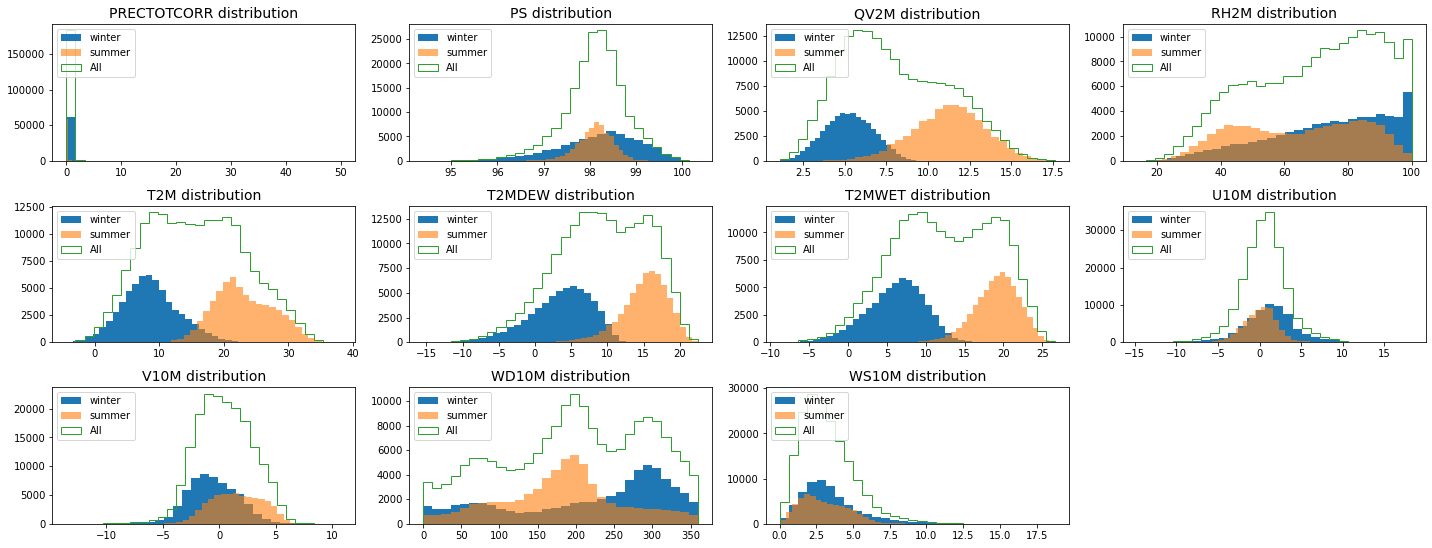

In [10]:
# plotting histograms for the summer, winter and complete datasets for all parameters
hist_plots2(data1=winter.drop(['YEAR', 'MO', 'DY', 'HR'], axis= 1), 
          data2 = summer.drop(['YEAR', 'MO', 'DY', 'HR'], axis= 1),
          data3 = df.drop(['YEAR', 'MO', 'DY', 'HR'], axis= 1),  
          rows=4,
          cols=4,
          figsize=(20,10))

Most bimodality and multimodality seem to be explained by the seasons, except for the RH2M (Relative Humidity at 2 Meters) parameter where summer exhibits bimodality and the WD10M (Wind Direction at 10 Meters) parameter that winter exhibits bimodality and summer shows long tails. 

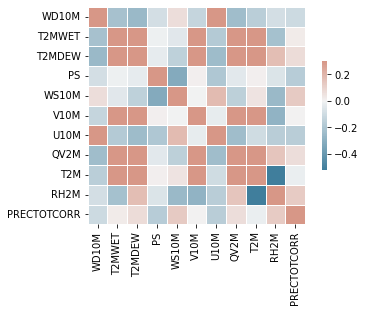

In [11]:
# Compute the correlation matrix
corr = dist_df.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [12]:
corr.style.background_gradient(cmap='coolwarm')

,WD10M,T2MWET,T2MDEW,PS,WS10M,V10M,U10M,QV2M,T2M,RH2M,PRECTOTCORR
WD10M,1.000000,-0.216033,-0.252374,-0.087025,0.065047,-0.128004,0.685399,-0.236954,-0.160080,-0.089118,-0.108198
T2MWET,-0.216033,1.000000,0.919590,-0.007821,-0.046663,0.550570,-0.174889,0.907060,0.946047,-0.221807,0.021697
T2MDEW,-0.252374,0.919590,1.000000,-0.030136,-0.150424,0.439300,-0.241298,0.978419,0.742672,0.172536,0.069524
PS,-0.087025,-0.007821,-0.030136,1.000000,-0.318132,0.009889,-0.191077,-0.043349,0.011523,-0.064812,-0.167962
WS10M,0.065047,-0.046663,-0.150424,-0.318132,1.000000,-0.002058,0.178678,-0.152139,0.044529,-0.251688,0.130267
V10M,-0.128004,0.550570,0.439300,0.009889,-0.002058,1.000000,-0.029744,0.411166,0.576124,-0.278762,0.002113
U10M,0.685399,-0.174889,-0.241298,-0.191077,0.178678,-0.029744,1.000000,-0.236049,-0.099084,-0.161562,-0.163534
QV2M,-0.236954,0.907060,0.978419,-0.043349,-0.152139,0.411166,-0.236049,1.000000,0.739114,0.147467,0.065242
T2M,-0.160080,0.946047,0.742672,0.011523,0.044529,0.576124,-0.099084,0.739114,1.000000,-0.520365,-0.020356
RH2M,-0.089118,-0.221807,0.172536,-0.064812,-0.251688,-0.278762,-0.161562,0.147467,-0.520365,1.000000,0.125918


From the correlation matrix we see that there is multicollinearity (> 0.8) specially in features T2MWET and T2MDEW. I will try to substract them from T2M and check again for multicollinearity.

In [13]:
# adding features to deal with multicollinearity
df_coll = df.copy()
df_coll['sub_wet'] = df_coll['T2M'] - df_coll['T2MWET']
df_coll['sub_dew'] = df_coll['T2M'] - df_coll['T2MDEW']
corr2 = df_coll.corr()
corr2.style.background_gradient(cmap='coolwarm')

,YEAR,MO,DY,HR,WD10M,T2MWET,T2MDEW,PS,WS10M,V10M,U10M,QV2M,T2M,RH2M,PRECTOTCORR,sub_wet,sub_dew
YEAR,1.000000,-0.000141,0.000162,-0.000000,-0.009591,0.040146,0.054517,0.007046,-0.017755,0.011512,-0.016383,0.055816,0.023465,0.029378,0.021244,-0.031866,-0.031865
MO,-0.000141,1.000000,0.010587,-0.000000,-0.030859,0.272296,0.288606,0.039282,-0.055579,0.043469,-0.031697,0.290578,0.226091,0.030288,0.019682,-0.017696,-0.017689
DY,0.000162,0.010587,1.000000,0.000000,-0.015117,0.014485,0.011374,-0.001472,-0.009214,0.005718,-0.017383,0.013156,0.015305,-0.008192,0.004111,0.008778,0.008782
HR,-0.000000,-0.000000,0.000000,1.000000,-0.015477,0.083608,0.044564,-0.002097,0.099804,0.238213,0.020228,0.038587,0.105757,-0.110748,-0.002486,0.102281,0.102278
WD10M,-0.009591,-0.030859,-0.015117,-0.015477,1.000000,-0.216033,-0.252374,-0.087025,0.065047,-0.128004,0.685399,-0.236954,-0.160080,-0.089118,-0.108198,0.071238,0.071240
T2MWET,0.040146,0.272296,0.014485,0.083608,-0.216033,1.000000,0.919590,-0.007821,-0.046663,0.550570,-0.174889,0.907060,0.946047,-0.221807,0.021697,0.278095,0.278100
T2MDEW,0.054517,0.288606,0.011374,0.044564,-0.252374,0.919590,1.000000,-0.030136,-0.150424,0.439300,-0.241298,0.978419,0.742672,0.172536,0.069524,-0.121647,-0.121644
PS,0.007046,0.039282,-0.001472,-0.002097,-0.087025,-0.007821,-0.030136,1.000000,-0.318132,0.009889,-0.191077,-0.043349,0.011523,-0.064812,-0.167962,0.053915,0.053919
WS10M,-0.017755,-0.055579,-0.009214,0.099804,0.065047,-0.046663,-0.150424,-0.318132,1.000000,-0.002058,0.178678,-0.152139,0.044529,-0.251688,0.130267,0.249891,0.249886
V10M,0.011512,0.043469,0.005718,0.238213,-0.128004,0.550570,0.439300,0.009889,-0.002058,1.000000,-0.029744,0.411166,0.576124,-0.278762,0.002113,0.316919,0.316920


There is still multicollinearity so I will try removing columns and checking if it helps. I will use variance inflation factor to check for correlations (<20).

In [14]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_new = df.drop(['T2M','T2MWET','T2MDEW'], axis = 1)
vif = pd.DataFrame()
vif["features"] = df_new.columns
vif["vif_Factor"] = [variance_inflation_factor(df_new.values, i) for i in range(df_new.shape[1])]
vif

,features,vif_Factor
0,YEAR,21725.094957
1,MO,5.086244
2,DY,4.197795
3,HR,4.042576
4,WD10M,10.672097
5,PS,21314.816470
6,WS10M,5.099711
7,V10M,1.554391
8,U10M,2.185374
9,QV2M,11.783134


The values of surface pressure (PS) and YEAR are very hight (> 20). I will eliminate PS and check for VIF values again.

In [15]:
df_new2 = df_new.drop(['PS'], axis = 1)
vif2 = pd.DataFrame()
vif2["features"] = df_new2.columns
vif2["vif_Factor"] = [variance_inflation_factor(df_new2.values, i) for i in range(df_new2.shape[1])]
vif2

,features,vif_Factor
0,YEAR,46.508540
1,MO,5.063512
2,DY,4.197696
3,HR,4.040850
4,WD10M,10.661429
5,WS10M,4.722167
6,V10M,1.553903
7,U10M,2.125575
8,QV2M,11.594880
9,RH2M,17.696294


The values seem ok except for year but it has decreased considerably so I decide to keep it.

In [17]:
month_avg = df.groupby(['YEAR', 'MO']).mean()

In [18]:
avg_pivot = month_avg.reset_index().pivot('YEAR','MO','T2M')
avg_pivot

MO,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2001,7.501640,8.229345,13.053750,13.256111,17.697728,22.357583,23.753844,25.055806,19.729722,18.305296,10.358681,5.611774
2002,7.705685,9.358274,11.670081,13.699736,15.978737,22.467528,23.456075,22.356008,19.916833,16.313642,11.787931,9.065887
2003,6.313427,6.529598,11.059194,13.276097,17.851855,24.626375,25.651734,27.198118,20.405000,14.856102,11.913472,7.834220
2004,7.599772,8.017816,9.511210,12.054958,15.595605,21.774472,23.039691,24.306223,21.020250,17.600202,10.563389,8.004704
2005,6.204073,5.439315,9.547406,13.313319,18.281344,23.284028,24.853293,23.182151,20.466875,17.272702,10.732986,5.467191
2006,6.606747,7.537708,10.690981,14.340014,18.353441,22.027514,26.764946,23.309987,21.369931,18.533441,13.537847,8.431519
2007,8.620027,9.717753,10.554032,14.747708,18.199597,21.796625,23.814919,23.014960,20.705889,16.228199,10.519014,7.611882
2008,8.972742,9.491193,10.489919,13.568708,16.339449,21.049486,23.892419,24.510995,20.444694,16.068105,9.766444,6.831142
2009,6.574288,7.990283,10.716801,13.059972,18.854624,22.705819,24.719906,25.789315,21.154083,17.537581,12.373722,7.695081


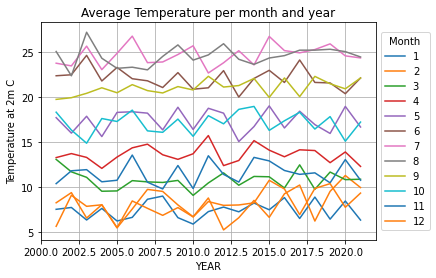

In [19]:
avg_pivot.plot(title = 'Average Temperature per month and year', grid = True)
plt.ylabel('Temperature at 2m C')
plt.legend(title = 'Month', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

There is a lot of variance per year.

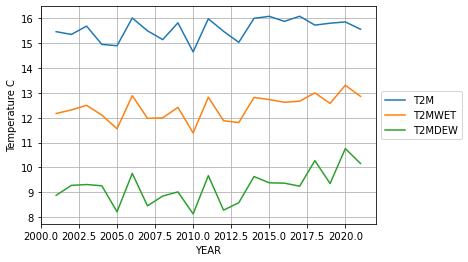

In [20]:
year_avg = df.groupby(['YEAR']).mean()
year_avg[['T2M','T2MWET', 'T2MDEW']].plot(grid= True)
plt.ylabel('Temperature C')
plt.legend( loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Again we see the variance of the month but 2013-2014 there is less variance.